In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_data = pd.read_csv(
    'https://api.coronavirus.data.gov.uk/v2/data?areaType=utla&metric=newCasesBySpecimenDate&format=csv'
)

In [5]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.head()

,date,areaType,areaCode,areaName,newCasesBySpecimenDate
0,2021-04-02,utla,N09000002,"Armagh City, Banbridge and Craigavon",7
1,2021-04-01,utla,N09000002,"Armagh City, Banbridge and Craigavon",8
2,2021-03-31,utla,N09000002,"Armagh City, Banbridge and Craigavon",13
3,2021-03-30,utla,N09000002,"Armagh City, Banbridge and Craigavon",9
4,2021-03-29,utla,N09000002,"Armagh City, Banbridge and Craigavon",13


In [29]:
# fig, ax = plt.subplots(figsize=(8,6))
covid_data.groupby('areaCode').plot(legend=None)

AttributeError: 'SeriesGroupBy' object has no attribute 'stack'

<AxesSubplot:xlabel='date'>

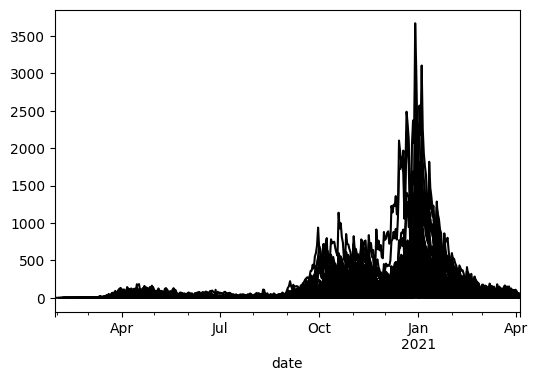

In [53]:
covid_data['newCasesBySpecimenDate'].unstack().plot(legend=None, color='k')

In [59]:
covid_data.reset_index()

,date,areaCode,areaType,areaName,newCasesBySpecimenDate
0,2021-04-02,N09000002,utla,"Armagh City, Banbridge and Craigavon",7
1,2021-04-01,N09000002,utla,"Armagh City, Banbridge and Craigavon",8
2,2021-03-31,N09000002,utla,"Armagh City, Banbridge and Craigavon",13
3,2021-03-30,N09000002,utla,"Armagh City, Banbridge and Craigavon",9
4,2021-03-29,N09000002,utla,"Armagh City, Banbridge and Craigavon",13
...,...,...,...,...,...
85616,2020-03-14,E06000059,utla,Dorset,2
85617,2020-03-13,E06000059,utla,Dorset,1
85618,2020-03-12,E06000059,utla,Dorset,2
85619,2020-03-11,E06000059,utla,Dorset,1


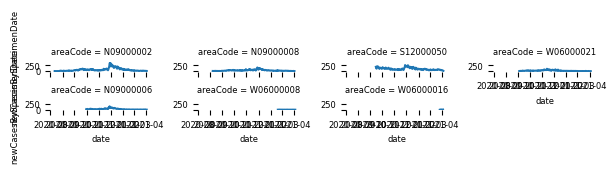

In [46]:
with plt.rc_context({'figure.dpi': 100, 'font.size': 6}):
    g = sns.relplot(
        data=covid_data.iloc[:1000],
        x='date',
        y='newCasesBySpecimenDate',
        col='areaCode',
        kind='line',
        col_wrap=4,
        height=0.5,
        aspect=3,
    )
    g.despine(left=True, bottom=True)

In [28]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [31]:
plt.axis?

Signature: plt.axis(*args, emit=True, **kwargs)
Docstring:
Convenience method to get or set some axis properties.

Call signatures::

  xmin, xmax, ymin, ymax = axis()
  xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
  xmin, xmax, ymin, ymax = axis(option)
  xmin, xmax, ymin, ymax = axis(**kwargs)

Parameters
----------
xmin, xmax, ymin, ymax : float, optional
    The axis limits to be set.  This can also be achieved using ::

        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

option : bool or str
    If a bool, turns axis lines and labels on or off. If a string,
    possible values are:

    ======== ==========================================================
    Value    Description
    ======== ==========================================================
    'on'     Turn on axis lines and labels. Same as ``True``.
    'off'    Turn off axis lines and labels. Same as ``False``.
    'equal'  Set equal scaling (i.e., make circles circular) by
             changing axis limits